<a href="https://colab.research.google.com/github/Sayantan-iitkgp/Amazon-UI-Clone/blob/main/Lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Q1

Man–Wolf–Goat–Cabbage

In [2]:
from collections import deque

def is_valid(state):
    M, W, G, C = state
    # Wolf eats Goat
    if W == G and M != W:
        return False
    # Goat eats Cabbage
    if G == C and M != G:
        return False
    return True

def successors(state):
    M, W, G, C = state
    moves = []
    for move in [None, 'W', 'G', 'C']:
        new_state = list(state)
        new_state[0] ^= 1  # man crosses
        if move == 'W' and W == M:
            new_state[1] ^= 1
        elif move == 'G' and G == M:
            new_state[2] ^= 1
        elif move == 'C' and C == M:
            new_state[3] ^= 1
        elif move is not None:
            continue
        new_state = tuple(new_state)
        if is_valid(new_state):
            moves.append(new_state)
    return moves

def bfs():
    start = (0,0,0,0)
    goal = (1,1,1,1)
    q = deque([(start, [])])
    visited = set([start])

    while q:
        state, path = q.popleft()
        if state == goal:
            return path + [state]
        for nxt in successors(state):
            if nxt not in visited:
                visited.add(nxt)
                q.append((nxt, path + [state]))

solution = bfs()
for s in solution:
    print(s)


(0, 0, 0, 0)
(1, 0, 1, 0)
(0, 0, 1, 0)
(1, 1, 1, 0)
(0, 1, 0, 0)
(1, 1, 0, 1)
(0, 1, 0, 1)
(1, 1, 1, 1)


9-Puzzle (BFS)

In [3]:
from collections import deque

goal = (1,2,3,4,5,6,7,8,0)

def get_neighbors(state):
    idx = state.index(0)
    r, c = divmod(idx, 3)
    moves = []
    for dr, dc in [(-1,0),(1,0),(0,-1),(0,1)]:
        nr, nc = r+dr, c+dc
        if 0 <= nr < 3 and 0 <= nc < 3:
            nidx = nr*3 + nc
            lst = list(state)
            lst[idx], lst[nidx] = lst[nidx], lst[idx]
            moves.append(tuple(lst))
    return moves

def bfs_9puzzle(start):
    q = deque([(start, [])])
    visited = set([start])

    while q:
        state, path = q.popleft()
        if state == goal:
            return path + [state]
        for nxt in get_neighbors(state):
            if nxt not in visited:
                visited.add(nxt)
                q.append((nxt, path + [state]))

start = (1,2,3,4,0,6,7,5,8)
solution = bfs_9puzzle(start)
print("Moves:", len(solution)-1)


Moves: 2


15-Puzzle (IDS Skeleton)

In [5]:
def dfs_limited(state, depth, visited):
    if state == goal:
        return [state]
    if depth == 0:
        return None
    visited.add(state)
    for nxt in get_neighbors(state):
        if nxt not in visited:
            res = dfs_limited(nxt, depth-1, visited)
            if res:
                return [state] + res
    visited.remove(state)
    return None

def iterative_deepening(start, max_depth=30):
    for d in range(max_depth):
        visited = set()
        res = dfs_limited(start, d, visited)
        if res:
            return res


8-Queens Problem

In [10]:
N = 8
solutions = []

def is_safe(board, row, col):
    for r in range(row):
        if board[r] == col or \
           abs(board[r] - col) == row - r:
            return False
    return True

def dfs_queens(row, board):
    if row == N:
        solutions.append(board.copy())
        return
    for col in range(N):
        if is_safe(board, row, col):
            board[row] = col
            dfs_queens(row+1, board)

dfs_queens(0, [-1]*N)
print("Number of solutions:", len(solutions))

Number of solutions: 92


Obtain 5 from 4

In [7]:
import math
from collections import deque

def neighbors(x):
    ops = []
    if x >= 0 and x <= 6:
        ops.append((math.factorial(int(x)), f"({x})!"))
    if x >= 0:
        ops.append((math.sqrt(x), f"√({x})"))
    ops.append((math.floor(x), f"⌊{x}⌋"))
    return ops

def bfs():
    start = (4, "4")
    q = deque([start])
    visited = set([4])

    while q:
        val, expr = q.popleft()
        if abs(val - 5) < 1e-6:
            return expr
        for nxt, e in neighbors(val):
            if nxt not in visited and nxt <= 120:
                visited.add(nxt)
                q.append((nxt, e.replace(str(val), expr)))

print("Expression:", bfs())


Expression: None


Q2

Source: 4
Target: 58
Shortest distance: 129.86
Number of edges in path: 5


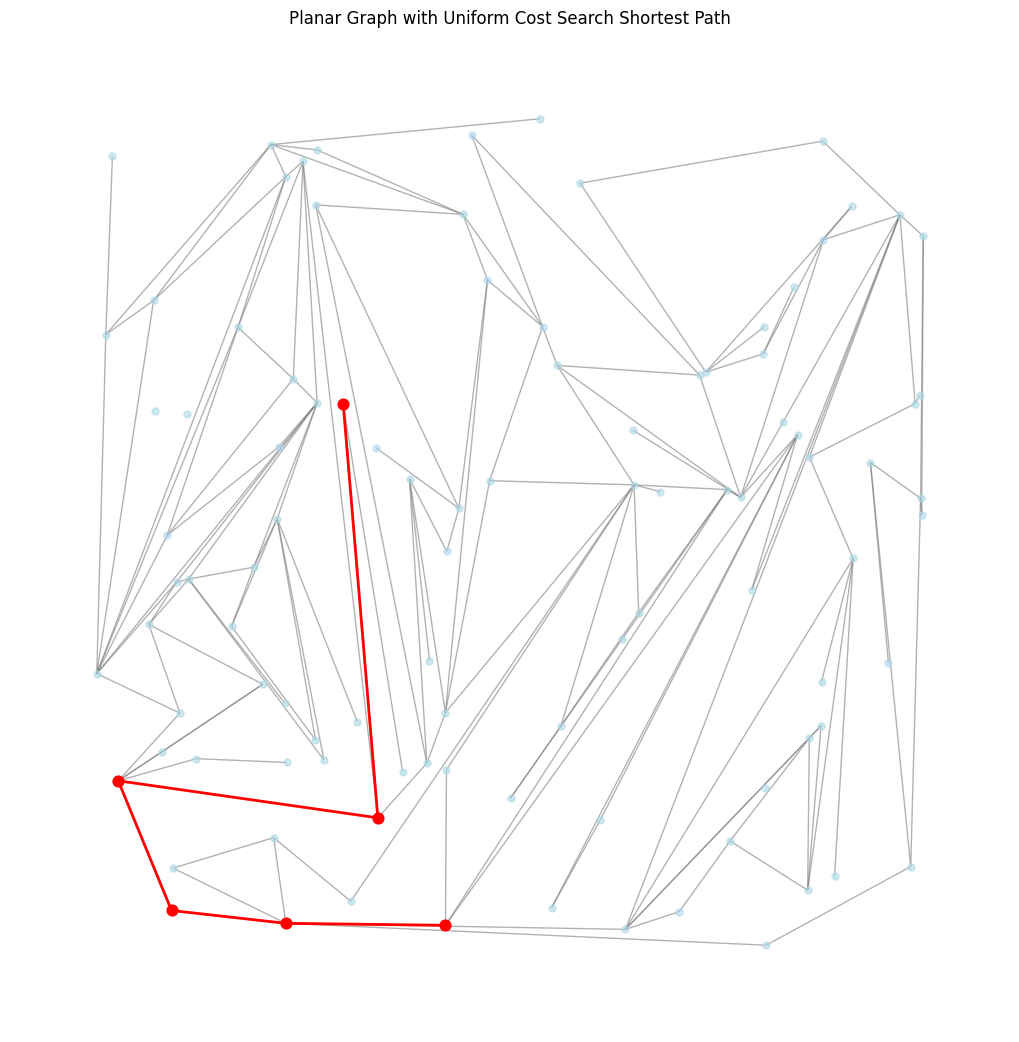

In [8]:
import random
import math
import heapq
import matplotlib.pyplot as plt
import networkx as nx

# -----------------------------
# Line segment intersection check
# -----------------------------
def segments_intersect(p1, p2, p3, p4):
    def orient(a, b, c):
        return (b[0] - a[0]) * (c[1] - a[1]) - (b[1] - a[1]) * (c[0] - a[0])

    def on_segment(a, b, c):
        return (min(a[0], b[0]) <= c[0] <= max(a[0], b[0]) and
                min(a[1], b[1]) <= c[1] <= max(a[1], b[1]))

    o1 = orient(p1, p2, p3)
    o2 = orient(p1, p2, p4)
    o3 = orient(p3, p4, p1)
    o4 = orient(p3, p4, p2)

    if o1 * o2 < 0 and o3 * o4 < 0:
        return True
    if o1 == 0 and on_segment(p1, p2, p3): return True
    if o2 == 0 and on_segment(p1, p2, p4): return True
    if o3 == 0 and on_segment(p3, p4, p1): return True
    if o4 == 0 and on_segment(p3, p4, p2): return True

    return False

# -----------------------------
# Generate random points
# -----------------------------
random.seed(42)
N_POINTS = 100
points = [(random.uniform(0, 100), random.uniform(0, 100)) for _ in range(N_POINTS)]

# -----------------------------
# Add non-intersecting edges
# -----------------------------
edges = []
MAX_EDGES = 200
attempts = 0

while len(edges) < MAX_EDGES and attempts < 30000:
    u, v = random.sample(range(N_POINTS), 2)
    p1, p2 = points[u], points[v]

    valid = True
    for x, y in edges:
        if len({u, v, x, y}) < 4:
            continue
        if segments_intersect(p1, p2, points[x], points[y]):
            valid = False
            break

    if valid:
        edges.append((u, v))

    attempts += 1

# -----------------------------
# Build graph
# -----------------------------
G = nx.Graph()

for i, p in enumerate(points):
    G.add_node(i, pos=p)

for u, v in edges:
    weight = math.dist(points[u], points[v])
    G.add_edge(u, v, weight=weight)

# -----------------------------
# Uniform Cost Search (from scratch)
# -----------------------------
def uniform_cost_search(graph, start, goal):
    pq = [(0, start, [])]  # (cost, node, path)
    visited = set()

    while pq:
        cost, node, path = heapq.heappop(pq)

        if node in visited:
            continue

        visited.add(node)
        path = path + [node]

        if node == goal:
            return cost, path

        for neighbor in graph.neighbors(node):
            if neighbor not in visited:
                edge_cost = graph[node][neighbor]['weight']
                heapq.heappush(pq, (cost + edge_cost, neighbor, path))

    return float('inf'), []

# -----------------------------
# Choose source and target
# -----------------------------
source, target = random.sample(range(N_POINTS), 2)
distance, shortest_path = uniform_cost_search(G, source, target)

print("Source:", source)
print("Target:", target)
print("Shortest distance:", round(distance, 2))
print("Number of edges in path:", len(shortest_path) - 1)

# -----------------------------
# Visualization
# -----------------------------
pos = nx.get_node_attributes(G, 'pos')

plt.figure(figsize=(10, 10))

# Draw full graph
nx.draw(
    G, pos,
    node_size=25,
    node_color="lightblue",
    edge_color="gray",
    alpha=0.6
)

# Highlight shortest path
path_edges = list(zip(shortest_path, shortest_path[1:]))

nx.draw_networkx_nodes(
    G, pos,
    nodelist=shortest_path,
    node_color="red",
    node_size=60
)

nx.draw_networkx_edges(
    G, pos,
    edgelist=path_edges,
    edge_color="red",
    width=2
)

plt.title("Planar Graph with Uniform Cost Search Shortest Path")
plt.show()
